In [32]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn import metrics 
from sklearn.model_selection import RepeatedStratifiedKFold, StratifiedKFold, RepeatedKFold
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.base import clone
from sklearn.model_selection import train_test_split

In [22]:
path=r'/home/ludovico/ML-project/data/cup/ML-CUP23-'
train_set = pd.read_csv(path+'TR.csv',skiprows=7, header=None, delimiter=',', dtype=str)

input=train_set[train_set.columns[1:-3]]
target=train_set[train_set.columns[-3:]]


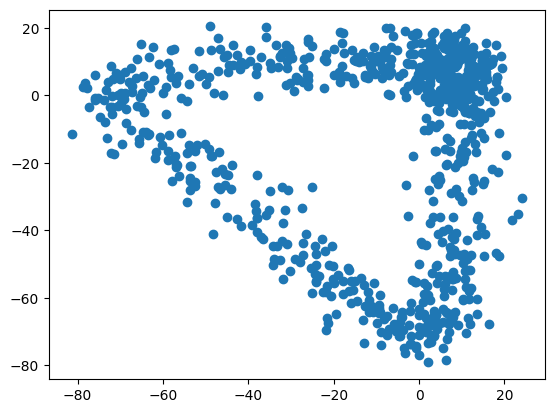

In [61]:
x_train, x_test, y_train, y_test = train_test_split(input, target, test_size=0.2, random_state=0, shuffle=True)

x=np.array(y_train[11].astype(np.float64))
y=np.array(y_train[12].astype(np.float64))
z=np.array(y_train[13].astype(np.float64))

#ax = plt.axes(projection='3d')
#ax.plot(x, y, z, linestyle='', marker='.')
plt.scatter(x,y)
plt.show()

In [44]:
estimator_MLP = MLPRegressor()


parameters_MLP= {
'learning_rate': [ "invscaling", "adaptive"],
'hidden_layer_sizes': [ (100,), (10,10), (10,10,10)],
'alpha': [0.0001,0.01],
'activation': ['relu'],
'learning_rate_init': [ 0.01, 0.1],
'power_t': [0.2],
'max_iter': [2000],
'batch_size':[10],
'solver' : ['sgd'],
'early_stopping': [True],
'n_iter_no_change': [10],
'momentum': [0,0.1,0.5],
'nesterovs_momentum': [True],
'tol': [1e-4],
'validation_fraction': [0.2],
#'random_state':[0]
}



# with GridSearch
grid_search = GridSearchCV(
    estimator=estimator_MLP,
    param_grid=parameters_MLP,
    #scoring = 'accuracy',
    cv=RepeatedKFold(n_splits=5, n_repeats=1, random_state=0),
    n_jobs=-1,
    return_train_score = True,
    refit='neg_mean_absolute_error',
    scoring='neg_mean_absolute_error'
)


In [45]:
MLP=grid_search.fit(x_train, y_train)
print(grid_search.best_params_) 

print('Best Score - Validation:', grid_search.best_score_ )
y_pred =MLP.predict(x_test)

print('Test-error:', metrics.mean_squared_error(y_test, y_pred))

cv_results_df = pd.DataFrame(grid_search.cv_results_)
cv_results_df[['mean_test_score','mean_train_score','param_learning_rate','param_hidden_layer_sizes','param_activation']]


/home/ludovico/.local/lib/python3.10/site-packages/sklearn/neural_network/_base.py:173: RuntimeWarning: overflow encountered in square
  return ((y_true - y_pred) ** 2).mean() / 2
/home/ludovico/.local/lib/python3.10/site-packages/sklearn/utils/extmath.py:192: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/home/ludovico/.local/lib/python3.10/site-packages/sklearn/utils/extmath.py:192: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/home/ludovico/.local/lib/python3.10/site-packages/sklearn/neural_network/_stochastic_optimizers.py:191: RuntimeWarning: invalid value encountered in multiply
  self.momentum * velocity - self.learning_rate * grad
/home/ludovico/.local/lib/python3.10/site-packages/sklearn/neural_network/_stochastic_optimizers.py:184: RuntimeWarning: invalid value encountered in multiply
  self.momentum * velocity - self.learning_rate * grad
/home/ludovico/.local/lib/python3.10/site-packages/sklearn/neural_network/_base.py:173: RuntimeWarning:

{'activation': 'relu', 'alpha': 0.0001, 'batch_size': 10, 'early_stopping': True, 'hidden_layer_sizes': (100,), 'learning_rate': 'adaptive', 'learning_rate_init': 0.01, 'max_iter': 2000, 'momentum': 0.5, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.2, 'solver': 'sgd', 'tol': 0.0001, 'validation_fraction': 0.2}
Best Score - Validation: -0.702728431031677
Test-error: 1.013536321101298


,mean_test_score,mean_train_score,param_learning_rate,param_hidden_layer_sizes,param_activation
0,-1.065271,-0.976150,invscaling,"(100,)",relu
1,-1.008647,-0.926568,invscaling,"(100,)",relu
2,-0.943079,-0.853590,invscaling,"(100,)",relu
3,NaN,NaN,invscaling,"(100,)",relu
4,NaN,NaN,invscaling,"(100,)",relu
...,...,...,...,...,...
67,-18.758472,-18.747540,adaptive,"(10, 10, 10)",relu
68,NaN,NaN,adaptive,"(10, 10, 10)",relu
69,NaN,NaN,adaptive,"(10, 10, 10)",relu
70,NaN,NaN,adaptive,"(10, 10, 10)",relu


{'activation': 'relu',
 'alpha': 0.01,
 'batch_size': 10,
 'early_stopping': True,
 'hidden_layer_sizes': (10,),
 'learning_rate': 'adaptive',
 'learning_rate_init': 0.01,
 'max_iter': 2000,
 'momentum': 0.5,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.2,
 'solver': 'sgd',
 'tol': 0.0001,
 'validation_fraction': 0.2}

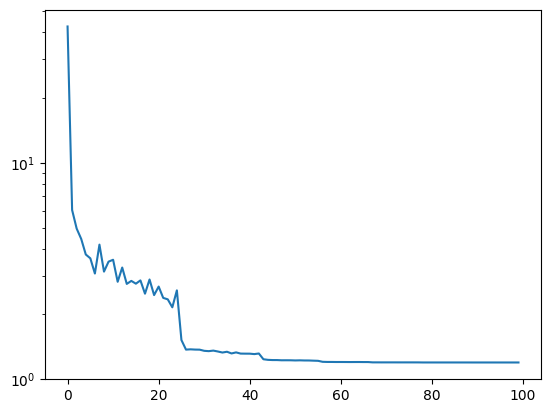

In [43]:
best_estimator = grid_search.best_estimator_


plt.plot(best_estimator.loss_curve_)
plt.yscale('log')
#plt.plot(best_estimator.validation_scores_)
grid_search.best_params_